In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress

import matplotlib.pyplot as plt
import fnmatch
plt.style.use('default')

In [4]:
import sys
from pathlib import Path
# rdkit.__path__

In [5]:
packages_list = os.listdir('/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/')
packages_list

['flatbuffers-24.3.25.dist-info',
 'fastjsonschema',
 'mistune.py',
 'h5py-3.11.0.dist-info',
 'selenium',
 'appnope',
 'mdurl',
 'packaging',
 'opt_einsum',
 'keras',
 'pytrie.py',
 'executing-0.8.3.dist-info',
 'multisplitby-0.0.1.dist-info',
 'PyQtChart-5.12.dist-info',
 'pyasn1',
 'google_auth-2.18.1-py3.9-nspkg.pth',
 'absl_py-1.4.0.dist-info',
 'decorator-5.1.1.dist-info',
 'more_click',
 'ffmpeg',
 'pydantic_core-2.18.4.dist-info',
 'mkl_random',
 'traitlets-5.1.1.dist-info',
 'tzdata-2024.1.dist-info',
 'beautifulsoup4-4.11.1.dist-info',
 'pyperclip',
 'networkx',
 'jupyterlab-3.4.4.dist-info',
 'package_readme.md',
 'wcwidth',
 'numpy-1.23.5.dist-info',
 'idna-3.3.dist-info',
 'websocket',
 'markupsafe',
 'charset_normalizer-2.0.4.dist-info',
 'smmap-5.0.1.dist-info',
 'jupyter_core',
 'google_auth_oauthlib',
 'pandocfilters-1.5.0.dist-info',
 'pyfiglet-0.8.post1.dist-info',
 'ptyprocess-0.7.0.dist-info',
 'sortedcontainers',
 'widgetsnbextension',
 'typing_extensions-4.12.1.d

In [6]:
import rdkit
sys.path

['/Users/ivanyankov/Documents/Chapter_DNA_Modelling/notebooks/experiments/Use_of_Synthetic_data',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python39.zip',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/lib-dynload',
 '',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages']

In [7]:
# Define the project folder name
project_name = "Chapter_DNA_Modelling"

# Get the current directory
current_path = Path().resolve()

# Traverse up the directory structure until the project folder is found
for parent in current_path.parents:
    if parent.name == project_name:
        project_root = parent
        break
else:
    raise FileNotFoundError(f"Project folder '{project_name}' not found in any parent directory.")

# Add the project src directory to sys.path
# sys.path.append(str(project_root / 'src'))
sys.path.append(str(project_root))
sys.path

['/Users/ivanyankov/Documents/Chapter_DNA_Modelling/notebooks/experiments/Use_of_Synthetic_data',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python39.zip',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/lib-dynload',
 '',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages',
 '/Users/ivanyankov/Documents/Chapter_DNA_Modelling']

In [8]:
# If using subfolders within src
from src.data.data_processing import load_data
from src.models import modeldev

# from .src.training.train_single_task import train_model, create_train_test_split
# from src.training.evaluate import evaluate_model
# from src.utils.utils import get_project_root

2024-09-04 14:41:39.295058: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# MT_CNN=model.CNNMultiTaskModel(hp='',num_tasks=1,task_names=['Tm'])

MT_CNN=modeldev.CNNMultiTaskModel(input_shape=(81,1),num_tasks=1,task_names=['Tm']).build_model()

2024-09-04 14:41:44.147969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-04 14:41:44.148096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
home=os.getcwd()
home
data_path='/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/'

In [11]:
df=pd.read_csv(data_path+'Lz_IY.csv')
X_df=df[['Tm','DNA']]
X_df
df2=pd.read_csv(data_path+'Mac_CNN_single_task.csv')
df2['DNA']=df2['Sequence']
X_df=pd.merge(X_df, df2, on='DNA', how='inner')
X_df=X_df.drop(['Unnamed: 0','DNA','Sequence'],axis=1)
X_df

,Tm,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,16.9,434,60,635,343,273,47,310,408,634,...,818,634,94,828,463,354,69,413,558,811
1,27.9,514,73,736,396,323,57,359,474,747,...,942,747,114,962,534,418,84,477,649,957
2,32.0,594,86,837,449,373,67,408,540,860,...,1066,860,134,1096,605,482,99,541,740,1103
3,35.7,434,60,687,203,273,47,548,514,634,...,742,634,94,903,284,354,69,738,675,811
4,37.0,434,60,662,201,273,47,522,512,634,...,773,634,94,872,284,354,69,702,670,811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,28.7,434,60,792,120,273,47,724,573,634,...,617,634,94,1073,161,354,69,985,774,811
301,32.9,434,60,728,118,273,47,669,553,634,...,675,634,94,973,164,354,69,907,724,811
302,69.2,1074,164,1566,387,673,127,1289,1182,1538,...,1632,1538,254,2083,535,866,189,1732,1558,1979
303,35.8,434,60,692,113,273,47,621,536,634,...,700,634,94,921,162,354,69,841,696,811


In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

In [49]:
# Splitting data into features and target
X = X_df.drop(columns=['Tm'])
y = X_df['Tm']

# Performing the train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
# Reshaping X_train and X_val for CNN (adding a channel dimension)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

# Fitting the model
history = MT_CNN.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
7/7 [==============================] - 0s 56ms/step - loss: 35.6203 - mse: 35.6203 - mean_absolute_error: 4.5769 - r2_func_tf: 0.7171 - rmse_func_tf: 5.9940 - bias_func_tf: 0.5356 - sdep_func_tf: 5.7128 - val_loss: 65.3058 - val_mse: 65.3058 - val_mean_absolute_error: 6.5353 - val_r2_func_tf: 0.6948 - val_rmse_func_tf: 7.9984 - val_bias_func_tf: -5.0627 - val_sdep_func_tf: 6.1893
Epoch 2/50
7/7 [==============================] - 0s 49ms/step - loss: 42.7860 - mse: 42.7860 - mean_absolute_error: 5.0394 - r2_func_tf: 0.6863 - rmse_func_tf: 6.4305 - bias_func_tf: -0.2852 - sdep_func_tf: 5.5708 - val_loss: 79.0872 - val_mse: 79.0872 - val_mean_absolute_error: 7.2471 - val_r2_func_tf: 0.6292 - val_rmse_func_tf: 8.8149 - val_bias_func_tf: -6.2924 - val_sdep_func_tf: 6.1686
Epoch 3/50
7/7 [==============================] - 0s 49ms/step - loss: 33.3134 - mse: 33.3134 - mean_absolute_error: 4.4919 - r2_func_tf: 0.7812 - rmse_func_tf: 5.5823 - bias_func_tf: 0.1624 - sdep_func_tf: 5.40

In [56]:
history.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 81, 1)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 32)            128       
                                                                 
 maxpooling_1 (MaxPooling1D)  (None, 20, 32)           0         
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 20, 32)           128       
 tion)                                                           
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 32)             3104      
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 32)            0         
                                                           

In [60]:
# history.model.predict()
# Evaluate on validation set
val_loss = history.model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation MAE: ')

# Save the model
history.model.save('mt_cnn_model.h5')


3/3 [==============================] - 0s 21ms/step - loss: 16.8375 - mse: 16.8375 - mean_absolute_error: 3.2658 - r2_func_tf: 0.9214 - rmse_func_tf: 4.0727 - bias_func_tf: 1.4756 - sdep_func_tf: 3.7805
Validation Loss: [16.837528228759766, 16.837528228759766, 3.265846014022827, 0.9214274883270264, 4.072707653045654, 1.475584864616394, 3.7804787158966064], Validation MAE: 


In [15]:
df=pd.read_csv(data_path+'Lz_IY.csv')
X_df=df[['Tm','DNA']]
X_df
df2=pd.read_csv(data_path+'Mac_CNN_single_task.csv')
df2['DNA']=df2['Sequence']
X_df_iy=pd.merge(X_df, df2, on='DNA', how='inner')
X_df_iy=X_df_iy.drop(['Unnamed: 0','Sequence'],axis=1)
X_df_iy
# Search for the substring 'gtgaac' in all columns
mask = X_df_iy.apply(lambda row: row.astype(str).str.contains('gtgaac').any(), axis=1)
mask = X_df_iy.apply(lambda row: row.astype(str).str.contains('gtagctac').any(), axis=1)

# Extract the rows that contain the substring
matching_rows = X_df_iy[mask]
matching_rows

,Tm,DNA,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
262,36.3,gtagctac,434,60,711,176,273,47,593,525,...,700,634,94,945,243,354,69,800,700,811


In [86]:
gtgaac_df=pd.read_csv('DNA_Score_gtgaac.csv')
gtgaac_df=gtgaac_df.drop('Unnamed: 0',axis=1)
gtgaac_df

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,274,34,457,138,173,27,354,329,408,34,...,503,408,54,602,190,226,39,482,436,519
1,288,34,453,139,172,27,352,329,404,34,...,496,401,52,613,193,226,39,481,432,532
2,290,35,457,139,171,27,354,326,402,34,...,499,406,53,621,193,231,39,487,435,532
3,290,34,457,139,170,27,351,327,405,34,...,497,404,52,616,192,224,39,483,435,534
4,291,35,457,139,172,27,351,327,402,34,...,499,404,52,614,192,225,39,485,435,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,145,11,356,135,87,9,282,260,197,6,...,426,209,24,465,179,113,14,368,348,291
1597,203,9,338,127,106,11,277,244,263,6,...,409,263,21,459,171,139,17,370,336,356
1598,239,13,354,119,130,13,292,256,296,19,...,416,290,28,445,153,162,21,388,342,385
1599,255,25,373,127,138,22,296,259,323,13,...,430,332,42,472,165,188,27,385,346,446


In [84]:
gtgaac_df

,Unnamed: 0,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,0,274,34,457,138,173,27,354,329,408,...,503,408,54,602,190,226,39,482,436,519
1,1,288,34,453,139,172,27,352,329,404,...,496,401,52,613,193,226,39,481,432,532
2,2,290,35,457,139,171,27,354,326,402,...,499,406,53,621,193,231,39,487,435,532
3,3,290,34,457,139,170,27,351,327,405,...,497,404,52,616,192,224,39,483,435,534
4,4,291,35,457,139,172,27,351,327,402,...,499,404,52,614,192,225,39,485,435,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1596,145,11,356,135,87,9,282,260,197,...,426,209,24,465,179,113,14,368,348,291
1597,1597,203,9,338,127,106,11,277,244,263,...,409,263,21,459,171,139,17,370,336,356
1598,1598,239,13,354,119,130,13,292,256,296,...,416,290,28,445,153,162,21,388,342,385
1599,1599,255,25,373,127,138,22,296,259,323,...,430,332,42,472,165,188,27,385,346,446


In [83]:
X=gtgaac_df[:2].to_numpy()
X
X_new = X[i]

# Reshape the new data for the CNN model (if necessary)
X_new = X_new.reshape(1, -1, 1)

print(X_new.shape, X_val.shape)

(1, 82, 1) (92, 81, 1)


In [91]:
history.model.predict(matching_rows[matching_rows.columns[2:]].to_numpy().reshape(1,-1,1))

1/1 [==============================] - 0s 33ms/step


array([[22.236423]], dtype=float32)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
import numpy as np

# Define the custom metric function
def r2_func_tf(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

def r2_func_tf(y_true, y_pred, **kwargs):
        numerator = tf.reduce_sum(tf.square(y_true - y_pred))
        denominator = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
        r2 = 1 - numerator / denominator
        return r2

def rmse_func_tf(y_true, y_pred, **kwargs):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    return rmse

def bias_func_tf(y_true, y_pred, **kwargs):
    bias = tf.reduce_mean(y_true - y_pred)
    return bias

def sdep_func_tf(y_true, y_pred, **kwargs):
    diff = y_true - y_pred
    mean_diff = tf.reduce_mean(diff)
    sdep = tf.sqrt(tf.reduce_mean(tf.square(diff - mean_diff)))
    return sdep

# Load the model with the custom metric
custom_objects = {'r2_func_tf': r2_func_tf,
                  'rmse_func_tf': rmse_func_tf,
                  'bias_func_tf': bias_func_tf,
                  'sdep_func_tf': sdep_func_tf,}

with custom_object_scope(custom_objects):
    model = load_model('mt_cnn_model.h5')



In [20]:
matching_rows[matching_rows.columns[2:]]

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
262,434,60,711,176,273,47,593,525,634,60,...,700,634,94,945,243,354,69,800,700,811


In [24]:
temp=pd.read_csv('DNA_Score_gtagctac.csv')
temp

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,434,60,711,176,273,47,593,525,634,60,...,700,634,94,945,243,354,69,800,700,811
1,456,61,708,177,270,47,591,521,627,61,...,694,624,92,963,248,350,69,809,695,834
2,457,61,707,179,271,47,592,519,633,63,...,692,628,90,957,246,356,69,805,694,833
3,457,60,711,177,272,47,589,524,628,62,...,689,629,90,955,245,353,69,807,691,827
4,457,62,708,178,271,47,588,520,629,60,...,698,630,91,959,247,353,69,803,691,834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,378,46,526,139,209,38,483,420,479,38,...,578,491,77,700,193,278,53,651,551,633
1597,235,19,482,128,135,15,434,356,296,3,...,514,315,31,632,173,183,24,582,477,419
1598,276,37,467,130,153,25,424,349,374,20,...,564,348,46,591,173,205,34,563,462,482
1599,380,32,576,154,212,32,506,450,469,25,...,564,493,64,771,203,283,46,672,606,644


In [28]:
import subprocess

In [40]:
X_new_str
X_new = np.fromstring(X_new_str, sep=',')
# X_new = X_new.reshape(1, -1, 1) 
# X_new.astype('float')
X_new
# X_new = X_new.reshape(1, -1, 1) 
# X_new

array([434.,  60., 711., 176., 273.,  47., 593., 525., 634.,  60.,   4.,
        98.,  40.,  48.,   4.,  92.,  94.,  94., 711.,  98., 953., 204.,
       375.,  60., 752., 820., 946., 176.,  40., 204.,  46.,  98.,  25.,
       154., 177., 243., 273.,  48., 375.,  98., 168.,  33., 321., 284.,
       354.,  47.,   4.,  60.,  25.,  33.,   4.,  69.,  58.,  69., 593.,
        92., 752., 154., 321.,  69., 601., 655., 800., 525.,  94., 820.,
       177., 284.,  58., 655., 678., 700., 634.,  94., 945., 243., 354.,
        69., 800., 700., 811.])

In [45]:
# Assuming `matching_rows` contains your data
X = temp.to_numpy()
results2 = []

# for i in range(len(X)):

X_new = X[0].astype('float')
X_new_str = ','.join(map(str, X_new))  # Convert NumPy array to comma-separated string

# Call the model executable and pass the input data as a command-line argument
result = subprocess.run(
    ['./exe', X_new_str],
    stdout=subprocess.PIPE,
    text=True
)

# Capture the predictions from the executable's output
predictions = result.stdout.strip()

# Convert the predictions back to a list/array and store it
predictions = eval(predictions)  # Convert string output back to a list (be cautious with eval)
results2.append(predictions)

# Print the predictions
print(predictions)

KeyboardInterrupt: 

Instructions for updating:
Colocations handled automatically by placer.
Cause: Unable to locate the source code of <function r2_func_tf at 0x7fdd39616430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function rmse_func_tf at 0x7fdd1847f310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could no

In [42]:
X_new_str
X_new = np.fromstring(X_new_str, sep=',')
# X_new = X_new.reshape(1, -1, 1) 
# X_new.astype('float')
X_new
X_new = X_new.reshape(1, -1, 1) 
# X_new
predictions = model.predict(X_new)
predictions

1/1 [==============================] - 0s 348ms/step


2024-09-04 17:14:23.242333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[36.064842]], dtype=float32)

In [43]:
print(predictions.tolist(), flush=True)

[[36.064842224121094]]


In [44]:
subprocess.run(
    ['./dist/exe', X_new_str]
)

KeyboardInterrupt: 

In [26]:
matching_rows
# # Example of new data
X=matching_rows[matching_rows.columns[2:]].to_numpy()
X=temp.to_numpy()
results2=[]
for i in range(len(X)):
    X_new = X[i].astype('float')

    # Reshape the new data for the CNN model (if necessary)
    X_new = X_new.reshape(1, -1, 1)

    # Make predictions
    predictions = model.predict(X_new)
    results2.append(predictions)
    # Print the predictions
    print(predictions)
# X[0]

1/1 [==============================] - 0s 34ms/step
[[36.064842]]
1/1 [==============================] - 0s 24ms/step
[[36.58913]]
1/1 [==============================] - 0s 24ms/step
[[36.42646]]
1/1 [==============================] - 0s 24ms/step
[[36.14195]]
1/1 [==============================] - 0s 23ms/step
[[36.745872]]
1/1 [==============================] - 0s 23ms/step
[[36.226368]]
1/1 [==============================] - 0s 22ms/step
[[36.362553]]
1/1 [==============================] - 0s 23ms/step
[[36.40791]]
1/1 [==============================] - 0s 24ms/step
[[36.5622]]
1/1 [==============================] - 0s 28ms/step
[[36.657276]]
1/1 [==============================] - 0s 33ms/step
[[35.960804]]
1/1 [==============================] - 0s 22ms/step
[[36.314816]]
1/1 [==============================] - 0s 24ms/step
[[36.261723]]
1/1 [==============================] - 0s 24ms/step
[[36.5319]]
1/1 [==============================] - 0s 25ms/step
[[35.87331]]
1/1 [==============

In [22]:
model.save('DNA_score_savedmode', save_format='tf')

INFO:tensorflow:Assets written to: DNA_score_savedmode/assets


INFO:tensorflow:Assets written to: DNA_score_savedmode/assets


In [88]:
# history.model.predict(X_val)

# # Example of new data
X=gtgaac_df.to_numpy()
results=[]
for i in range(len(X)):
    X_new = X[i]

    # Reshape the new data for the CNN model (if necessary)
    X_new = X_new.reshape(1, -1, 1)

    # Make predictions
    predictions = history.model.predict(X_new)
    results.append(predictions)
    # Print the predictions
    print(predictions)

1/1 [==============================] - 0s 28ms/step
[[22.236423]]
1/1 [==============================] - 0s 27ms/step
[[22.398294]]
1/1 [==============================] - 0s 24ms/step
[[22.281954]]
1/1 [==============================] - 0s 26ms/step
[[22.393576]]
1/1 [==============================] - 0s 24ms/step
[[22.292868]]
1/1 [==============================] - 0s 25ms/step
[[22.168955]]
1/1 [==============================] - 0s 25ms/step
[[22.06582]]
1/1 [==============================] - 0s 25ms/step
[[22.243303]]
1/1 [==============================] - 0s 24ms/step
[[22.052755]]
1/1 [==============================] - 0s 25ms/step
[[22.204443]]
1/1 [==============================] - 0s 25ms/step
[[22.515703]]
1/1 [==============================] - 0s 25ms/step
[[22.410728]]
1/1 [==============================] - 0s 24ms/step
[[21.987143]]
1/1 [==============================] - 0s 25ms/step
[[22.105223]]
1/1 [==============================] - 0s 26ms/step
[[22.951368]]
1/1 [======

In [104]:
values = [x[0][0] for x in results]

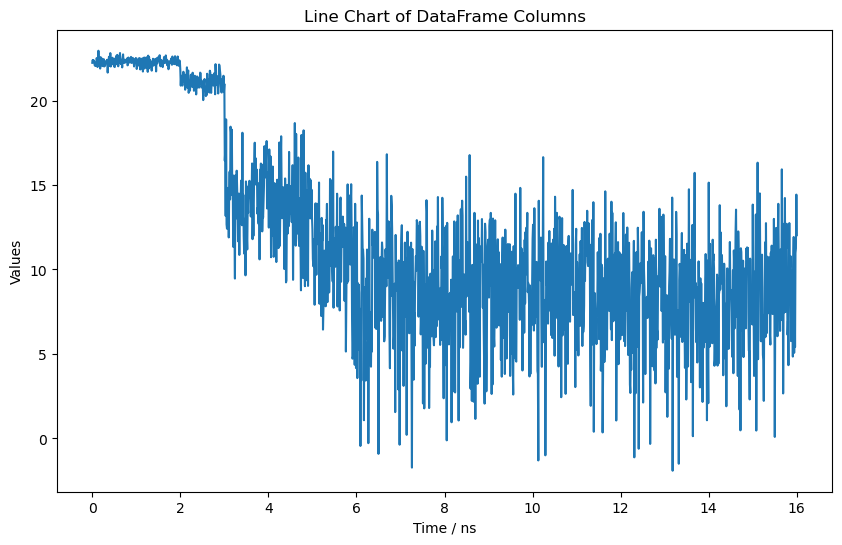

In [105]:

# Plotting
plt.figure(figsize=(10, 6))
# Plot each column

plt.plot((temp_df.index*10000*0.000001), values)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Values')
plt.title('Line Chart of DataFrame Columns')
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
# plt.savefig(f'{seq}_time_series_5_10ns.png')
plt.show()

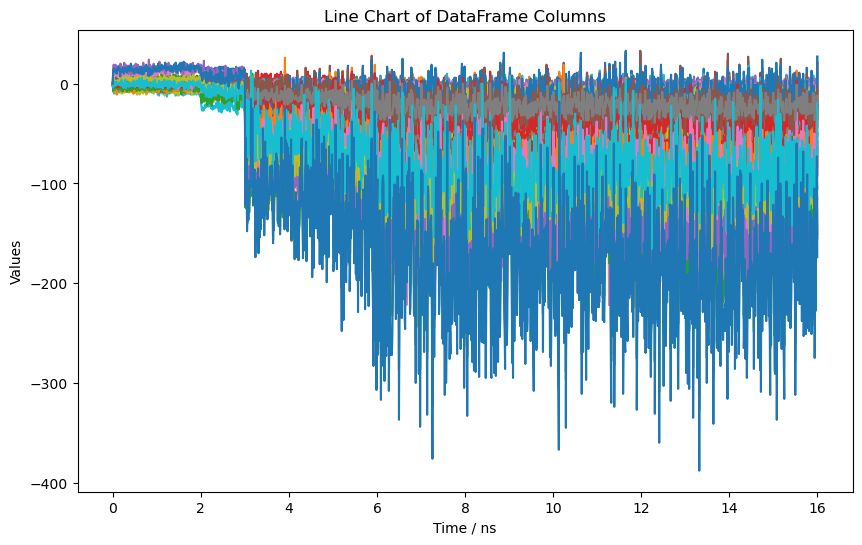

In [101]:
# Assuming you want to subtract the first row of matching_rows from all rows of gtgaac_df
row_to_subtract = matching_rows.iloc[0][matching_rows.columns[2:]].values

# Subtracting the row from all rows of gtgaac_df
temp_df = gtgaac_df.sub(row_to_subtract, axis=1)
temp_df

# Plotting
plt.figure(figsize=(10, 6))
# Plot each column
for column in temp_df.columns:
    plt.plot((temp_df.index*10000*0.000001), temp_df[column], label=column)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Values')
plt.title('Line Chart of DataFrame Columns')
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
# plt.savefig(f'{seq}_time_series_5_10ns.png')
plt.show()

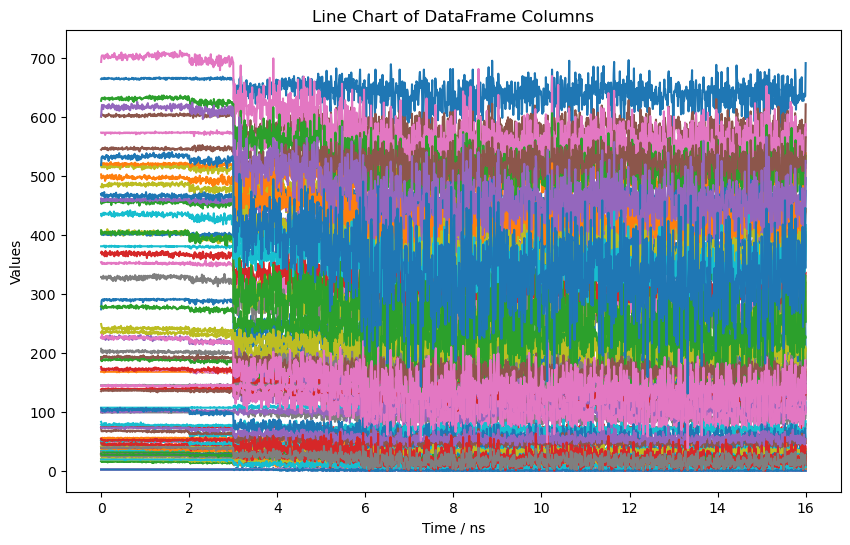

In [89]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot each column
for column in gtgaac_df.columns:
    plt.plot((gtgaac_df.index*10000*0.000001), gtgaac_df[column], label=column)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Values')
plt.title('Line Chart of DataFrame Columns')
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
# plt.savefig(f'{seq}_time_series_5_10ns.png')
plt.show()

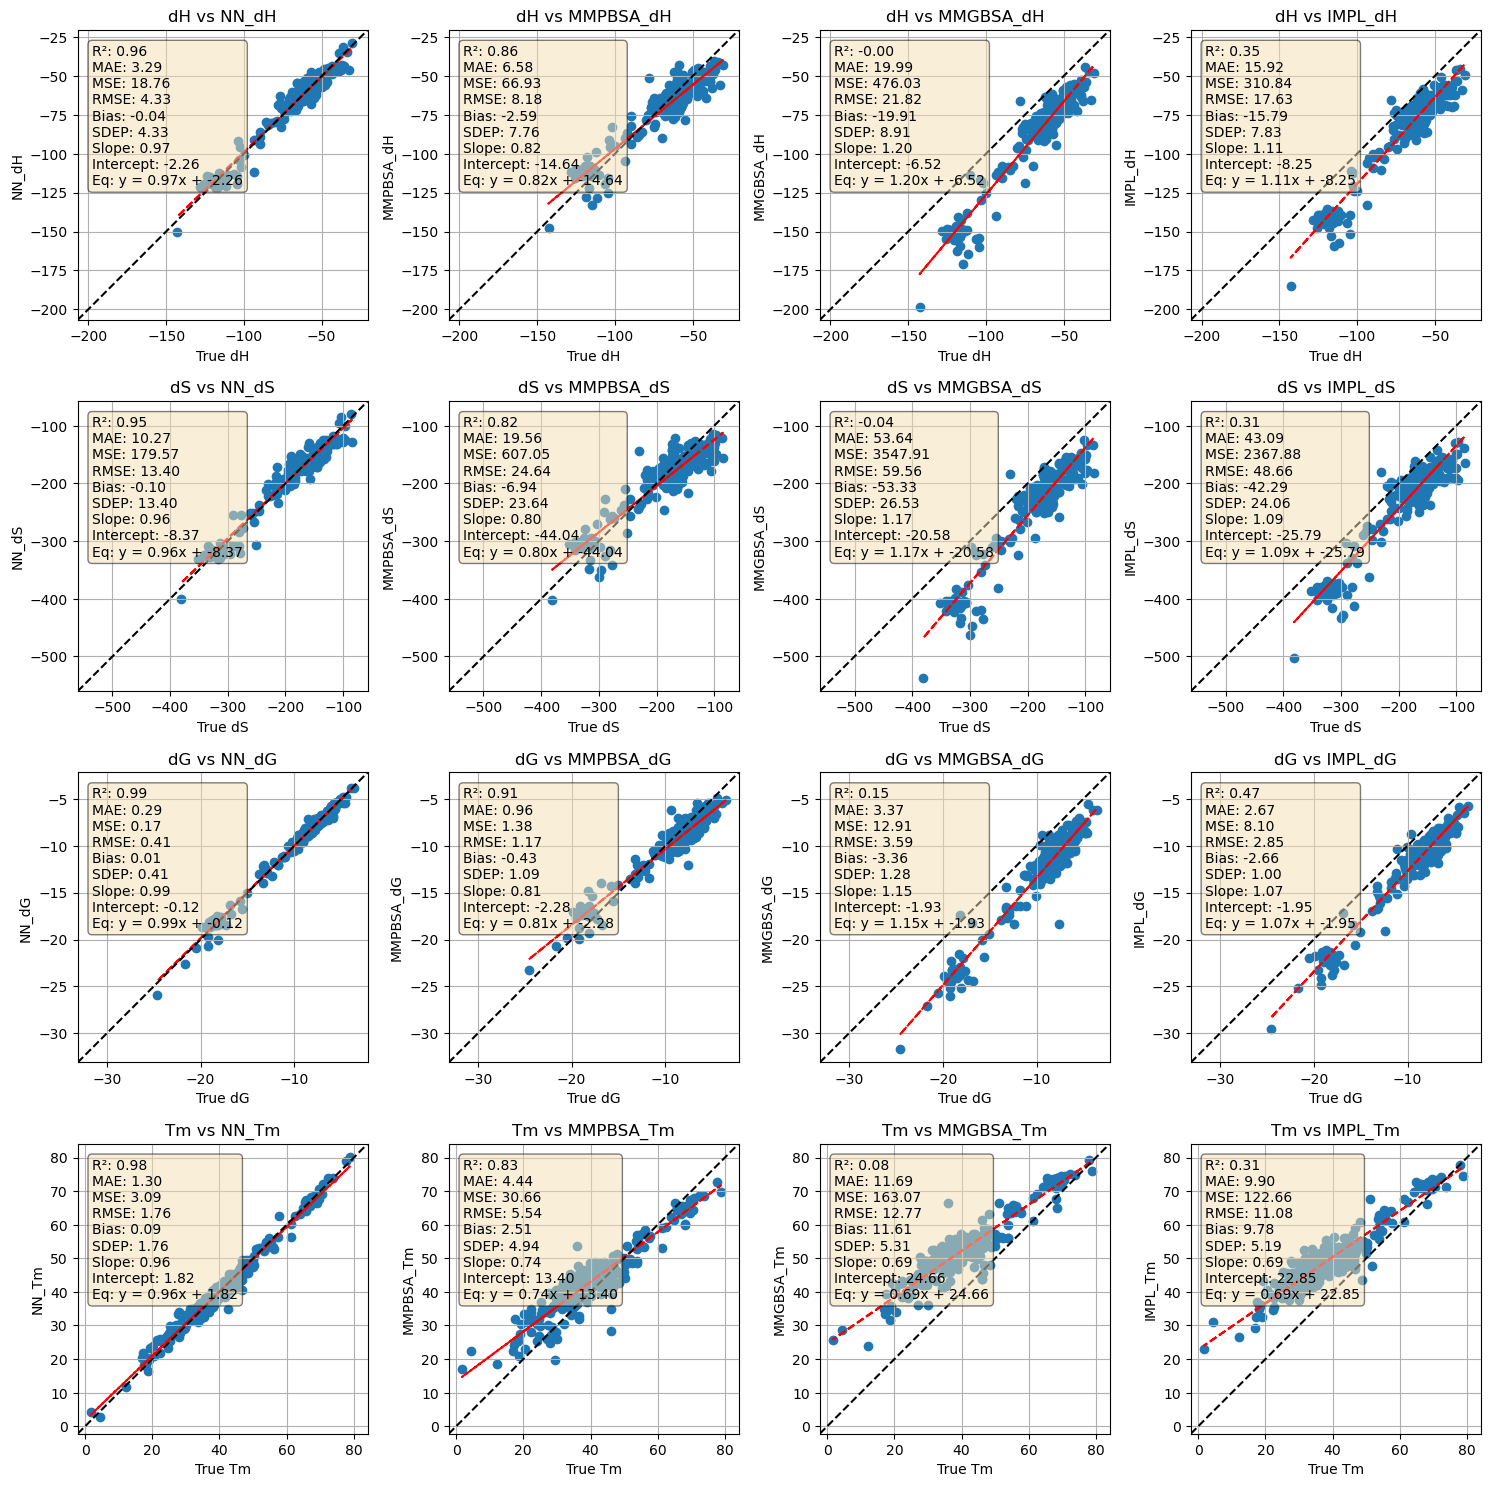

In [37]:
# Define the true values and the corresponding predicted columns
properties = ['dH', 'dS', 'dG', 'Tm']
methods = ['NN_', 'MMPBSA_', 'MMGBSA_', 'IMPL_']

# Determine the min and max limits for each property, with a buffer
buffer_factor = 0.05  # 5% buffer

limits = {}
for prop in properties:
    min_limit = min(df[prop].min(), df[f'NN_{prop}'].min(), df[f'MMPBSA_{prop}'].min(), df[f'MMGBSA_{prop}'].min(), df[f'IMPL_{prop}'].min())
    max_limit = max(df[prop].max(), df[f'NN_{prop}'].max(), df[f'MMPBSA_{prop}'].max(), df[f'MMGBSA_{prop}'].max(), df[f'IMPL_{prop}'].max())
    
    # Add buffer to the limits
    range_limit = max_limit - min_limit
    min_limit -= buffer_factor * range_limit
    max_limit += buffer_factor * range_limit
    
    limits[prop] = (min_limit, max_limit)
# Create a figure and axes for the 4x4 grid
# fig, axes = plt.subplots(4, 4, figsize=(8.27, 11.69))  # A4 size in inches

# Create a figure and axes for the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(15, 15))  # A4 size in inches


for i, prop in enumerate(properties):
    for j, method in enumerate(methods):
        ax = axes[i, j]
        true_values = df[prop]
        predicted_values = df[method + prop]

        # Scatter plot
        ax.scatter(true_values, predicted_values)

        # Fit the line of best fit
        slope, intercept, r_value, p_value, std_err = linregress(true_values, predicted_values)
        ax.plot(true_values, slope * true_values + intercept, color='red', linestyle='--')

        # Set the same X and Y limits for the same property
        ax.set_xlim(limits[prop])
        ax.set_ylim(limits[prop])

        # Set square aspect ratio
        ax.set_aspect('equal', 'box')

        # Plot the diagonal line y = x
        ax.plot(limits[prop], limits[prop], color='black', linestyle='--')

        ax.set_xlabel(f'True {prop}')
        ax.set_ylabel(f'{method}{prop}')
        ax.set_title(f'{prop} vs {method}{prop}')
        ax.grid(True)

        # Calculate metrics
        r2 = r2_score(true_values, predicted_values)
        mae = mean_absolute_error(true_values, predicted_values)
        mse = mean_squared_error(true_values, predicted_values)
        rmse = np.sqrt(mse)
        bias = np.mean(predicted_values - true_values)
        sdep = np.sqrt(np.mean((predicted_values - true_values - bias) ** 2))

        # Add text box with metrics
        textstr = (f'R²: {r2:.2f}\n'
                   f'MAE: {mae:.2f}\n'
                   f'MSE: {mse:.2f}\n'
                   f'RMSE: {rmse:.2f}\n'
                   f'Bias: {bias:.2f}\n'
                   f'SDEP: {sdep:.2f}\n'
                   f'Slope: {slope:.2f}\n'
                   f'Intercept: {intercept:.2f}\n'
                   f'Eq: y = {slope:.2f}x + {intercept:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

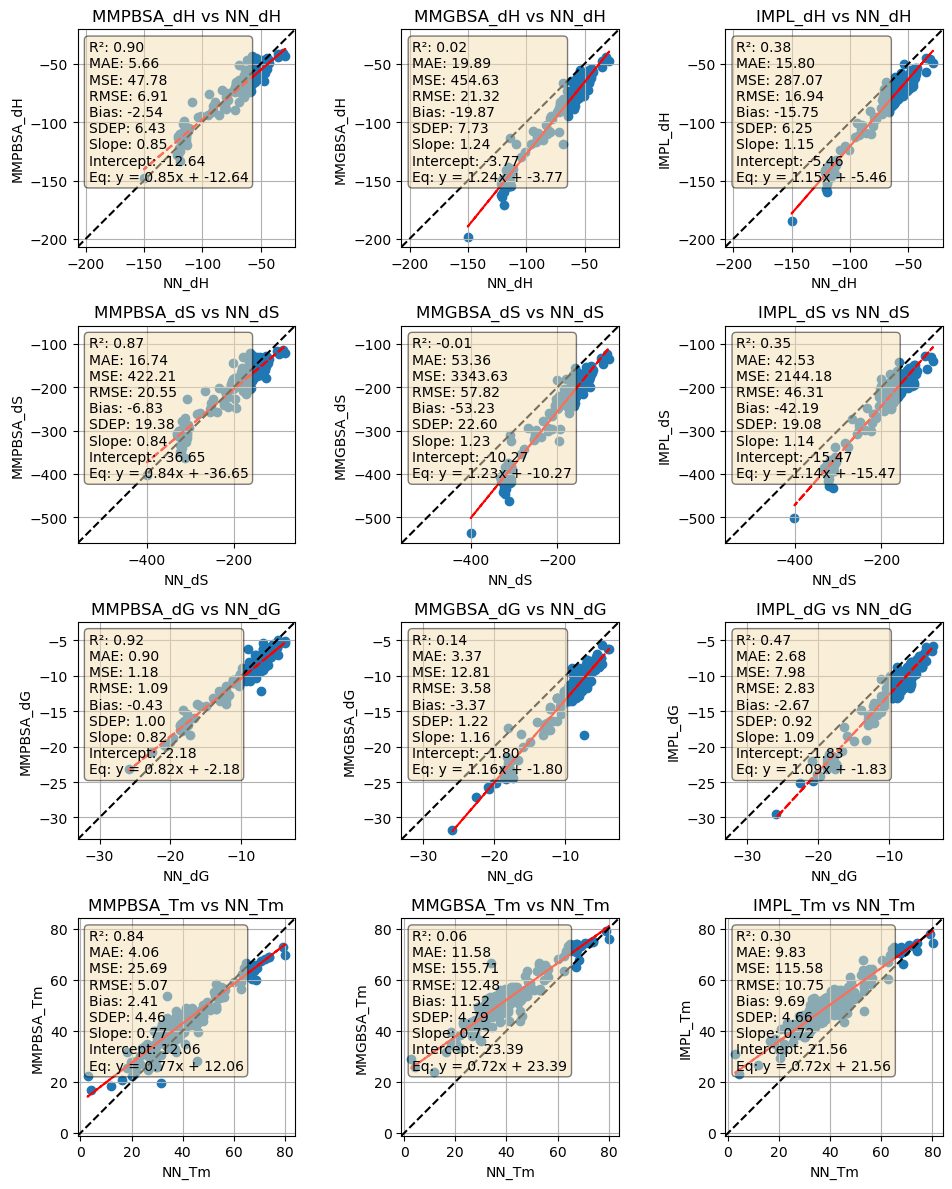

In [38]:

# Define the true values and the corresponding predicted columns
properties = ['dH', 'dS', 'dG', 'Tm']
methods = ['MMPBSA_', 'MMGBSA_', 'IMPL_']  # Comparing against NN_

# Determine the min and max limits for each property, with a buffer
buffer_factor = 0.05  # 5% buffer

limits = {}
for prop in properties:
    nn_values = df[f'NN_{prop}']
    min_limit = min(nn_values.min(), df[f'MMPBSA_{prop}'].min(), df[f'MMGBSA_{prop}'].min(), df[f'IMPL_{prop}'].min())
    max_limit = max(nn_values.max(), df[f'MMPBSA_{prop}'].max(), df[f'MMGBSA_{prop}'].max(), df[f'IMPL_{prop}'].max())
    
    # Add buffer to the limits
    range_limit = max_limit - min_limit
    min_limit -= buffer_factor * range_limit
    max_limit += buffer_factor * range_limit
    
    limits[prop] = (min_limit, max_limit)

# Create a figure and axes for the 4x3 grid
fig, axes = plt.subplots(4, 3, figsize=(10, 12))  # Adjust the size for square plots

for i, prop in enumerate(properties):
    nn_values = df[f'NN_{prop}']
    for j, method in enumerate(methods):
        ax = axes[i, j]
        predicted_values = df[method + prop]

        # Scatter plot
        ax.scatter(nn_values, predicted_values)

        # Fit the line of best fit
        slope, intercept, r_value, p_value, std_err = linregress(nn_values, predicted_values)
        ax.plot(nn_values, slope * nn_values + intercept, color='red', linestyle='--')

        # Set the same X and Y limits for the same property with buffer
        ax.set_xlim(limits[prop])
        ax.set_ylim(limits[prop])

        # Set square aspect ratio
        ax.set_aspect('equal', 'box')

        # Plot the diagonal line y = x
        ax.plot(limits[prop], limits[prop], color='black', linestyle='--')

        ax.set_xlabel(f'NN_{prop}')
        ax.set_ylabel(f'{method}{prop}')
        ax.set_title(f'{method}{prop} vs NN_{prop}')
        ax.grid(True)

        # Calculate metrics
        r2 = r2_score(nn_values, predicted_values)
        mae = mean_absolute_error(nn_values, predicted_values)
        mse = mean_squared_error(nn_values, predicted_values)
        rmse = np.sqrt(mse)
        bias = np.mean(predicted_values - nn_values)
        sdep = np.sqrt(np.mean((predicted_values - nn_values - bias) ** 2))

        # Add text box with metrics, slope, and linear equation
        textstr = (f'R²: {r2:.2f}\n'
                   f'MAE: {mae:.2f}\n'
                   f'MSE: {mse:.2f}\n'
                   f'RMSE: {rmse:.2f}\n'
                   f'Bias: {bias:.2f}\n'
                   f'SDEP: {sdep:.2f}\n'
                   f'Slope: {slope:.2f}\n'
                   f'Intercept: {intercept:.2f}\n'
                   f'Eq: y = {slope:.2f}x + {intercept:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

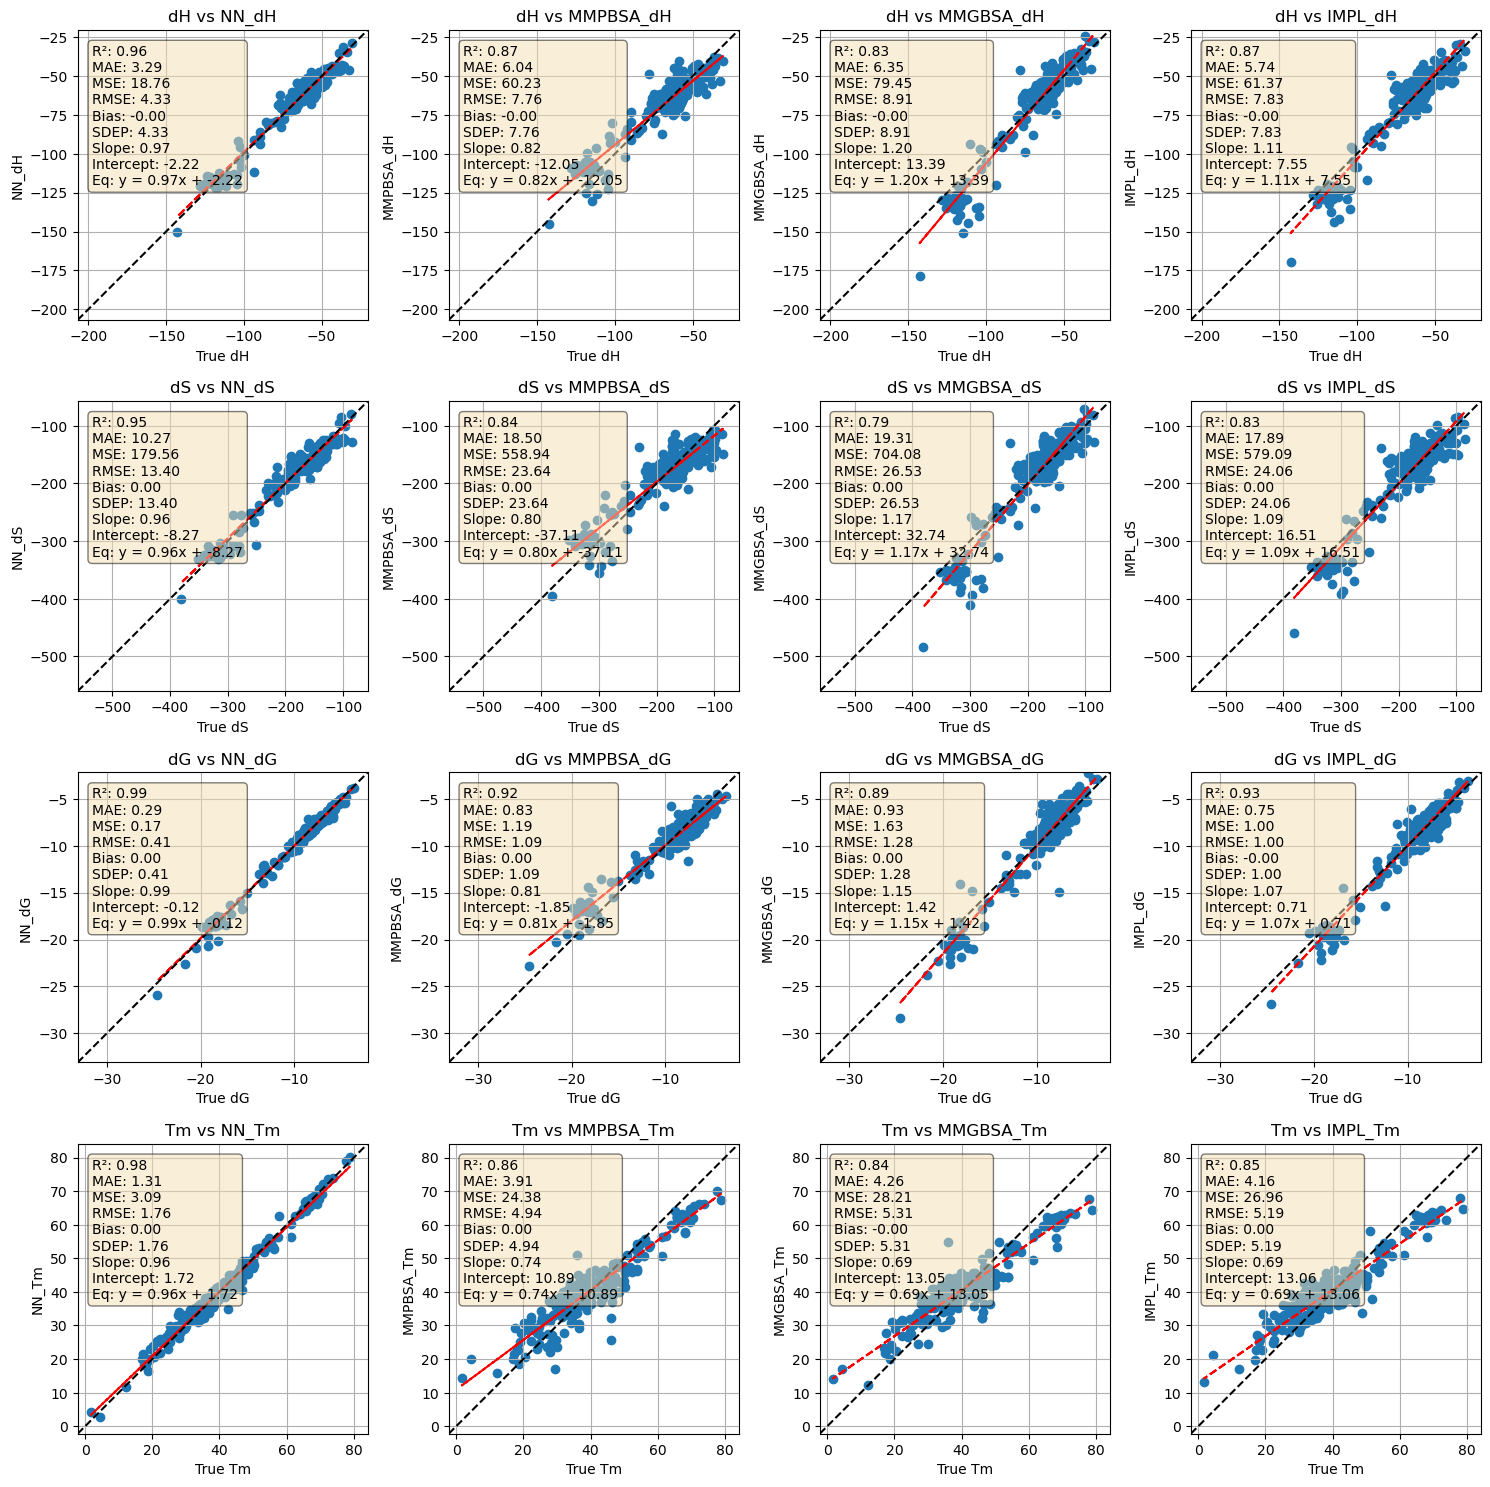

In [40]:
# Define the true values and the corresponding predicted columns
properties = ['dH', 'dS', 'dG', 'Tm']
methods = ['NN_', 'MMPBSA_', 'MMGBSA_', 'IMPL_']

# Determine the min and max limits for each property, with a buffer
buffer_factor = 0.05  # 5% buffer

limits = {}
for prop in properties:
    min_limit = min(df[prop].min(), df[f'NN_{prop}'].min(), df[f'MMPBSA_{prop}'].min(), df[f'MMGBSA_{prop}'].min(), df[f'IMPL_{prop}'].min())
    max_limit = max(df[prop].max(), df[f'NN_{prop}'].max(), df[f'MMPBSA_{prop}'].max(), df[f'MMGBSA_{prop}'].max(), df[f'IMPL_{prop}'].max())
    
    # Add buffer to the limits
    range_limit = max_limit - min_limit
    min_limit -= buffer_factor * range_limit
    max_limit += buffer_factor * range_limit
    
    limits[prop] = (min_limit, max_limit)
# Create a figure and axes for the 4x4 grid
# fig, axes = plt.subplots(4, 4, figsize=(8.27, 11.69))  # A4 size in inches

# Create a figure and axes for the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(15, 15))  # A4 size in inches


for i, prop in enumerate(properties):
    for j, method in enumerate(methods):
        ax = axes[i, j]
        true_values = df[prop]
        predicted_values = df[method + prop]
        bias = np.mean(predicted_values - true_values)
        predicted_values = df[method + prop]-bias

        # Scatter plot
        ax.scatter(true_values, predicted_values)

        # Fit the line of best fit
        slope, intercept, r_value, p_value, std_err = linregress(true_values, predicted_values)
        ax.plot(true_values, slope * true_values + intercept, color='red', linestyle='--')

        # Set the same X and Y limits for the same property
        ax.set_xlim(limits[prop])
        ax.set_ylim(limits[prop])

        # Set square aspect ratio
        ax.set_aspect('equal', 'box')

        # Plot the diagonal line y = x
        ax.plot(limits[prop], limits[prop], color='black', linestyle='--')

        ax.set_xlabel(f'True {prop}')
        ax.set_ylabel(f'{method}{prop}')
        ax.set_title(f'{prop} vs {method}{prop}')
        ax.grid(True)

        # Calculate metrics
        
        r2 = r2_score(true_values, predicted_values)
        mae = mean_absolute_error(true_values, predicted_values)
        mse = mean_squared_error(true_values, predicted_values)
        rmse = np.sqrt(mse)
        bias = np.mean(predicted_values - true_values)
        sdep = np.sqrt(np.mean((predicted_values - true_values - bias) ** 2))

        # Add text box with metrics
        textstr = (f'R²: {r2:.2f}\n'
                   f'MAE: {mae:.2f}\n'
                   f'MSE: {mse:.2f}\n'
                   f'RMSE: {rmse:.2f}\n'
                   f'Bias: {bias:.2f}\n'
                   f'SDEP: {sdep:.2f}\n'
                   f'Slope: {slope:.2f}\n'
                   f'Intercept: {intercept:.2f}\n'
                   f'Eq: y = {slope:.2f}x + {intercept:.2f}')
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [51]:
len(df.columns)
rf_score_columns = df.filter(like='RF-Score').columns

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf_score_columns = df.filter(like='RF-Score').columns

# Assuming 'target' is the name of your target column and the rest are features
X = df[rf_score_columns]  # Features
y = df['Tm']  # Target

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train
# X_train=df[rf_score_columns]
# y_train=df['dG']



/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<ErrorbarContainer object of 3 artists>

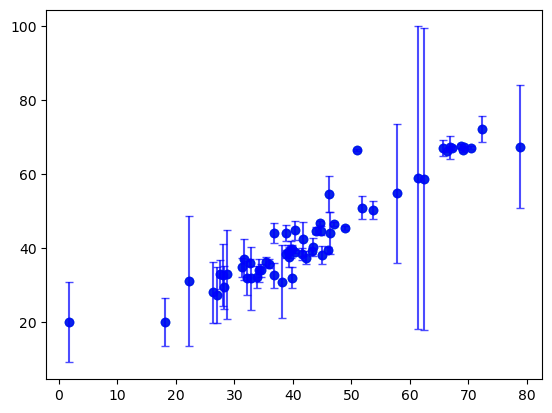

In [107]:

# Initial model training
model = RandomForestRegressor(n_estimators=100,max_depth=6,max_features=20)
model.fit(X_train.to_numpy(), y_train)
# sum(model.predict(X_train)-y_train)

# Generate predictions from each tree in the Random Forest for the pool of unlabeled data (X_pool)
predictions = np.array([tree.predict(X_test.to_numpy()) for tree in model.estimators_])

# Calculate the variance of these predictions across all trees
# This variance indicates the uncertainty for each data point in X_pool
prediction_variances = np.var(predictions, axis=0)

plt.scatter(y_test, model.predict(X_test))
plt.errorbar(y_test,model.predict(X_test),yerr=prediction_variances/2, fmt='o', color='blue', alpha=0.7, capsize=3, label='Predictions with Uncertainty')

In [118]:

# for iteration in range(max_iterations):
    # Step 1: Predict using the Random Forest and calculate uncertainties
    
# Generate predictions from each tree in the Random Forest for the pool of unlabeled data (X_pool)
predictions = np.array([tree.predict(X_test.to_numpy()) for tree in model.estimators_])

# Calculate the variance of these predictions across all trees
# This variance indicates the uncertainty for each data point in X_pool
prediction_variances = np.var(predictions, axis=0)

# # Step 2: Identify the most uncertain points
n_uncertain_points=10
# # Sort the variances in descending order and select the indices of the top n_uncertain_points
# # These are the data points where the model is most uncertain
uncertain_indices = np.argsort(prediction_variances)[-n_uncertain_points:]

# # Extract the actual data points (uncertain_data) from X_pool that correspond to these indices
uncertain_data = X_test.index[uncertain_indices]

# # (Optional) The corresponding variance values can be extracted as well for analysis or logging
uncertain_variances = prediction_variances[uncertain_indices]


# # At this point, uncertain_data contains the data points from X_pool where the Random Forest model
# has the highest uncertainty in its predictions.

In [119]:
uncertain_indices
X_test.index
uncertain_data
uncertain_variances

array([16.78770535, 16.90186519, 19.72552274, 21.68999805, 24.13937857,
       33.36221701, 35.26374502, 37.55440747, 81.77219471, 81.9253633 ])

In [134]:
df.loc[y_test.index]

,ID,Branch,DNA,dH,dS,dG,Tm,NN_dH,NN_dS,NN_dG,...,CountDNA_pos_A,CountDNA_pos_G,CountDNA_pos_C,CountDNA_pos_T,CountDNA_pos_Tot,CountDNAp_pos_A,CountDNAp_pos_G,CountDNAp_pos_C,CountDNAp_pos_T,CountDNAp_pos_Tot
180,181,2B,gcatggac,-64.3,-179.5,-8.8,40.3,-61.8,-171.7,-8.6,...,2,3,2,1,8,0.250000,0.375000,0.250000,0.125000,8
154,155,5AA,gacttgtggacggtat,-120.2,-326.0,-19.0,68.7,-119.5,-325.7,-18.5,...,3,6,2,5,16,0.187500,0.375000,0.125000,0.312500,16
111,112,7CC,cgctatgaaccacttg,-116.3,-317.0,-18.0,66.3,-118.3,-322.4,-18.3,...,4,3,5,4,16,0.250000,0.187500,0.312500,0.250000,16
247,248,4D,ggactta,-50.7,-146.0,-5.4,22.3,-47.7,-136.1,-5.5,...,2,2,1,2,7,0.285714,0.285714,0.142857,0.285714,7
60,61,8DD,caaagaaaag,-70.1,-199.0,-8.4,38.9,-70.1,-199.5,-8.2,...,7,2,1,0,10,0.700000,0.200000,0.100000,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,4D,gcggtaaggatctagt,-121.5,-333.0,-18.3,65.6,-114.7,-311.7,-18.0,...,4,6,2,4,16,0.250000,0.375000,0.125000,0.250000,16
104,105,7CC,cgatgttccagtca,-102.9,-281.0,-15.8,62.4,-104.1,-284.2,-15.9,...,3,3,4,4,14,0.214286,0.214286,0.285714,0.285714,14
302,303,5AA,ttgaagatacgctggc,-119.0,-322.0,-19.0,69.2,-118.7,-322.2,-18.7,...,4,5,3,4,16,0.250000,0.312500,0.187500,0.250000,16
194,195,3C,gccgcgac,-62.3,-165.0,-11.0,53.7,-66.3,-177.5,-11.2,...,1,3,4,0,8,0.125000,0.375000,0.500000,0.000000,8


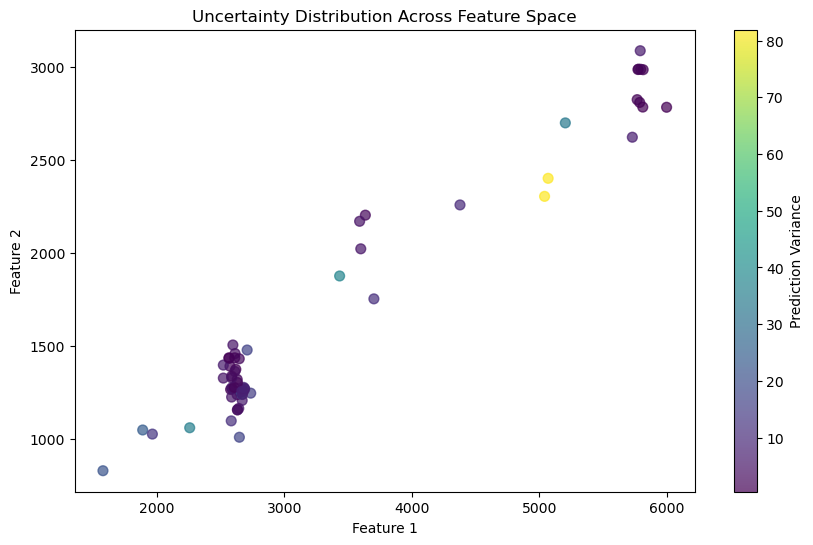

In [169]:
# Select the features you want to investigate
feature_1 = df.loc[y_test.index]['CountDNA_pos_Tot'] #X_test.iloc[:, 0]  # Assuming X1 is the first feature
feature_1 = X_test.iloc[:, 0] 
feature_2 = X_test.iloc[:, 1]  # Assuming X2 is the second feature

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(feature_1, feature_2, c=prediction_variances, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Prediction Variance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Uncertainty Distribution Across Feature Space')
plt.show()

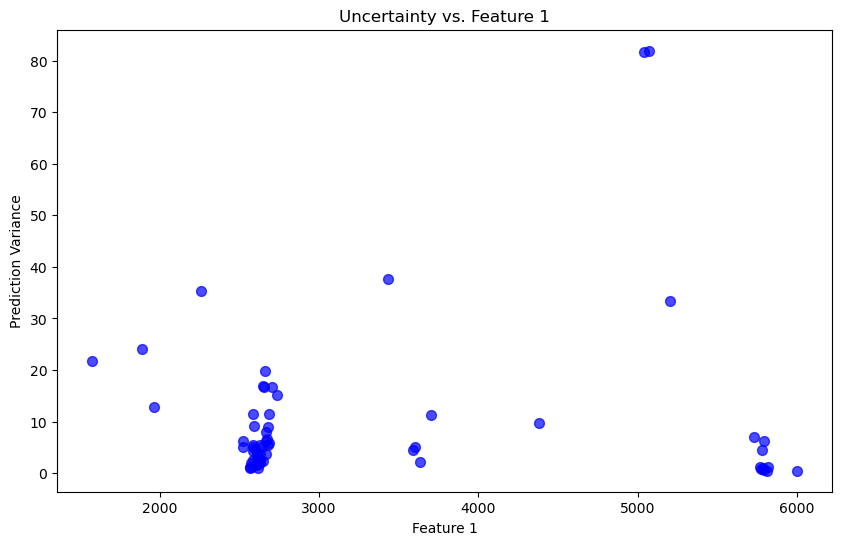

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(feature_1, prediction_variances, c='blue', s=50, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Prediction Variance')
plt.title('Uncertainty vs. Feature 1')
plt.show()

In [146]:
import seaborn as sns

In [171]:
df.loc[y_test.index]['CountDNA_pos_Tot'].value_counts()

CountDNA_pos_Tot
8     38
16    10
10     5
6      2
14     2
7      1
12     1
15     1
5      1
Name: count, dtype: int64

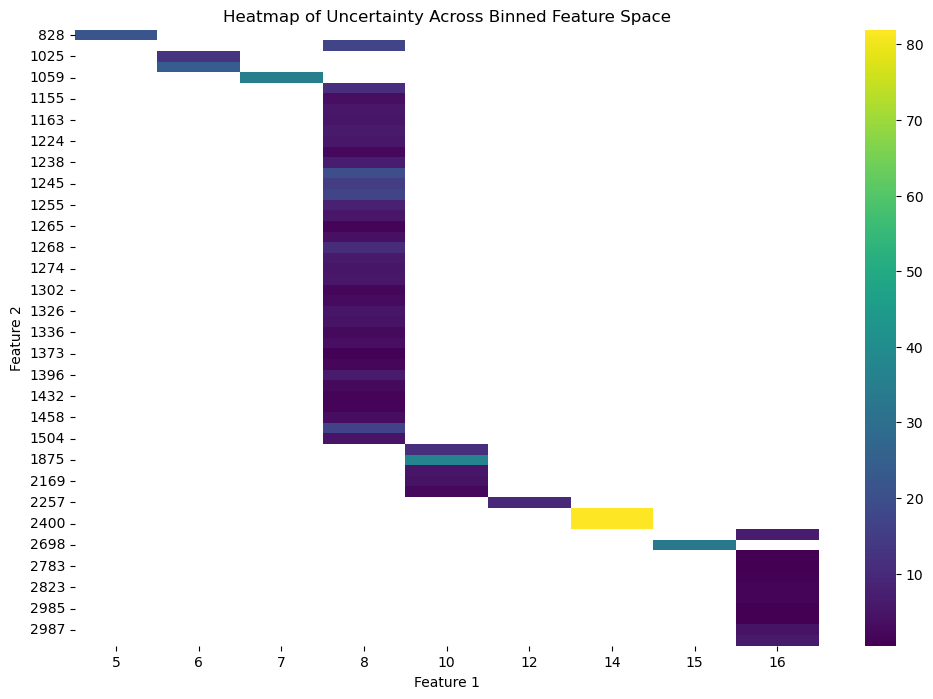

In [180]:
df_test=pd.DataFrame()
# Bin the features into intervals
df_test['Uncertainty'] = prediction_variances
df_test['Feature 1 Binned'] = df.loc[y_test.index]['CountDNA_pos_Tot'].reset_index(drop=True)
df_test['Feature 2 Binned'] = X_test.iloc[:, 1].reset_index(drop=True) #pd.cut(X_test.iloc[:, 1], bins=10)


# Calculate mean uncertainty for each bin
heatmap_data = df_test.pivot_table(values='Uncertainty', 
                              index='Feature 2 Binned', 
                              columns='Feature 1 Binned', 
                              aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Uncertainty Across Binned Feature Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

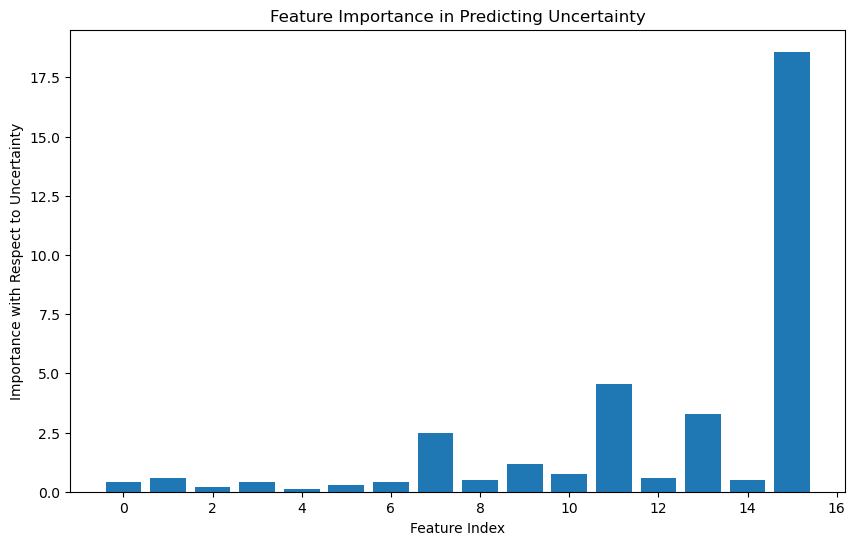

In [181]:
from sklearn.linear_model import LinearRegression

# Fit a linear model to predict uncertainty from features
model_uncertainty = LinearRegression()
model_uncertainty.fit(X_test, prediction_variances)

# Check the coefficients
coefficients = model_uncertainty.coef_
feature_importance = np.abs(coefficients)

# Plot feature importance with respect to uncertainty
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance with Respect to Uncertainty')
plt.title('Feature Importance in Predicting Uncertainty')
plt.show()


In [174]:
X_test.shape

(61, 16)

In [175]:
len(X_test.columns)
X_test.columns
X_test[X_test.columns[-1]]

180    12
154    25
111    25
247    11
60     19
       ..
218    25
104    23
302    25
194    12
185    12
Name: RF-Score_P----P, Length: 61, dtype: int64

/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


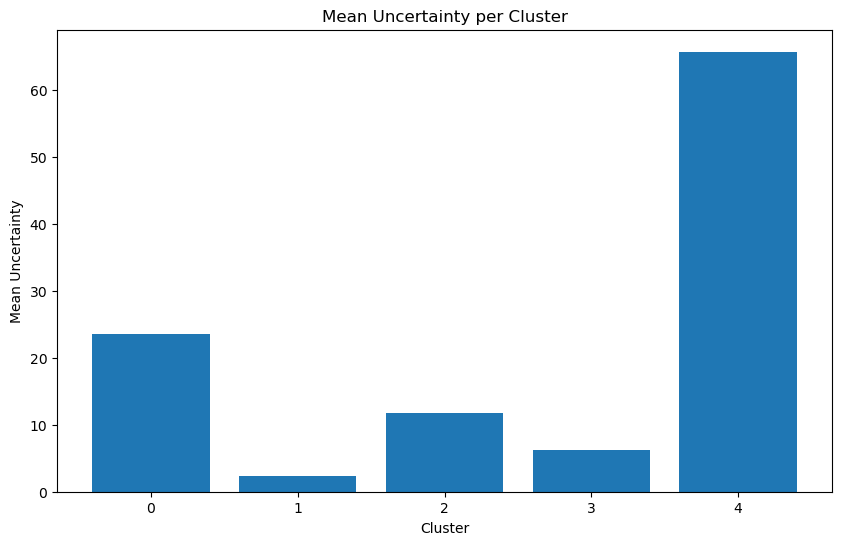

In [182]:
from sklearn.cluster import KMeans

# Cluster the data based on features
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_test)

# Add cluster labels to the DataFrame
df_test['Cluster'] = clusters

# Calculate mean uncertainty per cluster
cluster_uncertainty = df_test.groupby('Cluster')['Uncertainty'].mean()

# Plot cluster vs. uncertainty
plt.figure(figsize=(10, 6))
plt.bar(cluster_uncertainty.index, cluster_uncertainty.values)
plt.xlabel('Cluster')
plt.ylabel('Mean Uncertainty')
plt.title('Mean Uncertainty per Cluster')
plt.show()

In [183]:
df_test

,Uncertainty,Feature 1 Binned,Feature 2 Binned,Cluster
0,0.920319,8,1373,3
1,1.034761,16,2808,1
2,0.463720,16,2783,1
3,35.263745,7,1059,0
4,2.157061,10,2202,2
...,...,...,...,...
56,4.425225,16,2987,1
57,81.772195,14,2303,4
58,0.728396,16,2985,1
59,4.987979,8,1326,3


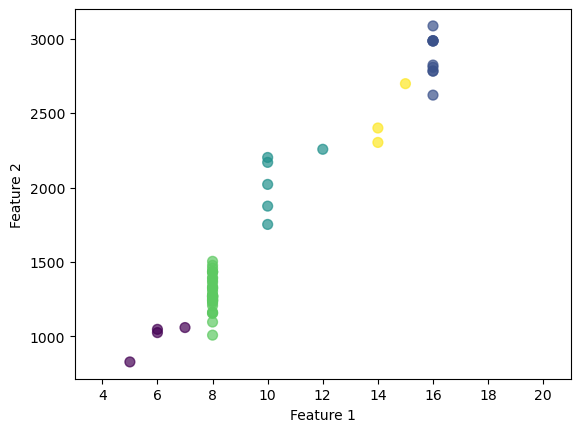

In [214]:
# Select the features you want to investigate
feature_1 = df.loc[y_test.index]['CountDNA_pos_Tot'] #X_test.iloc[:, 0]  # Assuming X1 is the first feature
# feature_1 = X_test.iloc[:, 0] 
feature_2 = X_test.iloc[:, 1]  # Assuming X2 is the second feature

# Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(feature_1, feature_2, c=df_test['Cluster'], cmap='viridis', s=50, alpha=0.7)
# plt.colorbar(label='Prediction Variance')
# plt.xlim(3, 21)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Uncertainty Distribution Across Feature Space')
# plt.show()
fig, ax = plt.subplots()
ax.scatter(feature_1, feature_2, c=df_test['Cluster'], cmap='viridis', s=50, alpha=0.7)
ax.set_xlim(3, 21)
# plt.colorbar(label='Prediction Variance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

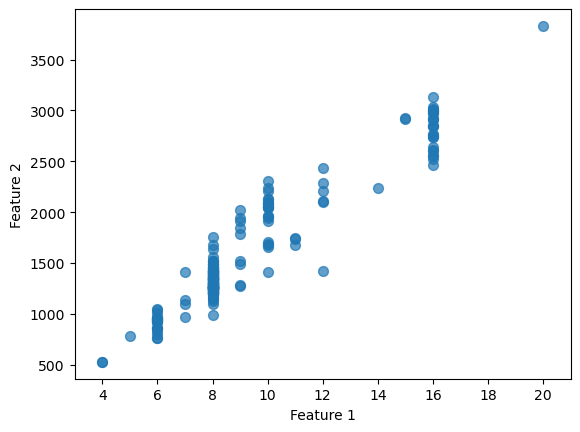

In [211]:
# Select the features you want to investigate
feature_1 = df.loc[y_train.index]['CountDNA_pos_Tot'] #X_test.iloc[:, 0]  # Assuming X1 is the first feature
# feature_1 = X_test.iloc[:, 0] 
feature_2 = X_train.iloc[:, 1]  # Assuming X2 is the second feature

# Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(feature_1, feature_2, s=50, alpha=0.7)
# plt.colorbar(label='Prediction Variance')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Uncertainty Distribution Across Feature Space')
# plt.show()

fig, ax = plt.subplots()
ax.scatter(feature_1, feature_2, s=50, alpha=0.7)
ax.set_xlim(3, 21)
# plt.colorbar(label='Prediction Variance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [79]:
predictions[0]

array([ -8.28      , -18.2       , -18.65384615,  -8.56363636,
        -7.80909091,  -4.8       , -11.8       ,  -6.64      ,
        -8.28      ,  -7.02857143,  -7.80285714, -17.3       ,
        -7.80285714,  -7.02857143,  -7.3       , -10.4       ,
       -10.3       ,  -9.83888889,  -8.30769231,  -7.80285714,
        -8.7047619 ,  -5.7       ,  -6.64      ,  -8.28      ,
        -6.64      ,  -9.34117647,  -9.34117647, -18.65384615,
        -8.30769231, -19.15      ,  -9.34117647,  -9.34117647,
        -7.80285714,  -8.7047619 ,  -8.56363636,  -6.64      ,
        -8.7047619 ,  -7.02857143, -18.65384615,  -8.7047619 ,
        -7.02857143,  -5.93333333, -11.2       ,  -7.02857143,
        -7.02857143,  -7.80285714,  -7.80285714, -16.8       ,
        -9.34117647, -11.1       ,  -9.34117647,  -7.02857143,
        -7.80909091, -20.5       , -17.6       ,  -8.30769231,
       -18.65384615, -19.15      , -18.65384615, -10.3       ,
        -9.83888889])

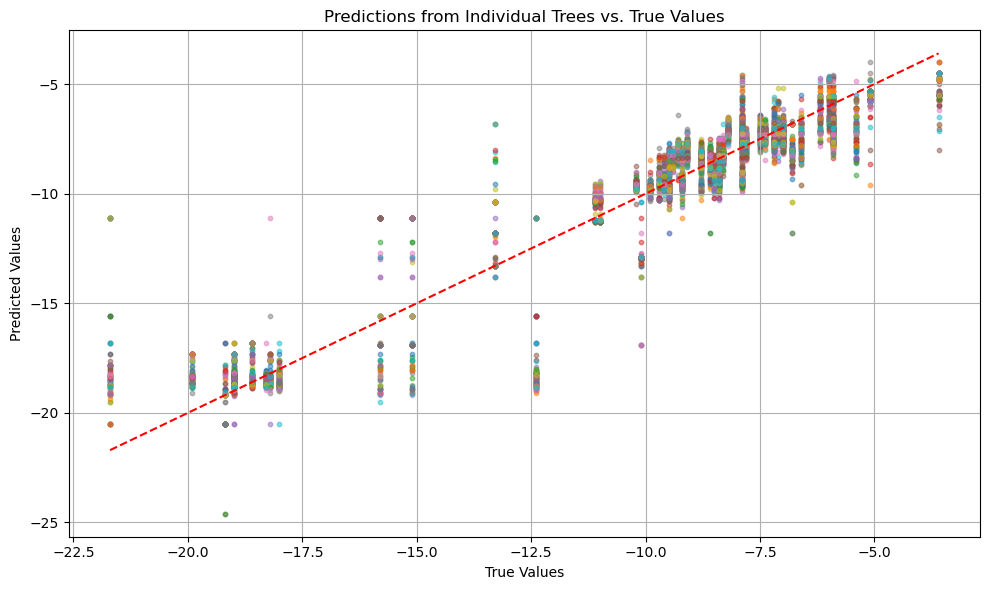

In [83]:
# true_values contains the actual target values for X_pool
true_values = y_test # y_pool  # y_pool contains the true labels for X_pool

# Plotting
plt.figure(figsize=(10, 6))

# Loop over each tree's predictions
for i, tree_predictions in enumerate(predictions):
    plt.scatter(true_values, tree_predictions, label=f'Tree {i + 1}', alpha=0.5, s=10)

# Plot a diagonal line y=x to compare predictions to the true values
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r--', label='y = x')

# Adding labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predictions from Individual Trees vs. True Values')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
prediction_variances

array([ 0.02199776,  0.18149637,  0.21568203,  0.71177232,  0.14189284,
        0.65444093,  2.33744674,  0.47775984,  0.10171102,  0.16828278,
        0.12828173,  0.34854889,  0.11960607,  0.07927993,  0.52503453,
        0.82569976,  0.28728112,  0.07995308,  0.07699272,  0.35465915,
        0.34992724,  0.45451092,  0.70478324,  0.06274914,  0.64340684,
        0.04740317,  0.1222619 ,  5.21387277,  0.18701714,  4.8700041 ,
        0.20474564,  0.24765444,  0.15467062,  0.03840729,  0.17321091,
        0.53344391,  0.84145954,  0.09455717,  0.23704345,  0.44100638,
        0.17522565,  0.46239301,  0.23960268,  0.1483833 ,  0.32383385,
        0.10915642,  0.09168506,  0.51828298,  0.23978666,  9.12021139,
        0.20182441,  0.10483569,  0.45889822,  1.50657336,  0.87383139,
        0.18343315,  0.07468359, 10.06788665,  0.05940967,  0.35716213,
        0.10320935])